In [ ]:
#Collection of Eric Zemmour's (@ZemmourEric), Marine Le Pen's, Emmanuel Macron's and Jean-Luc Mélenchon's last tweets (starting on the 1st of December and ending on the 27th of March)
!minet tw scrape tweets "(from:@ZemmourEric) until:2022-03-27 since:2021-12-01"  > tweets_zemmour.csv
!minet tw scrape tweets "(from:@MLP_officiel) until:2022-03-27 since:2021-12-01"  > tweets_lepen.csv
!minet tw scrape tweets "(from:@JLMelenchon) until:2022-03-27 since:2021-12-01"  > tweets_melenchon.csv
!minet tw scrape tweets "(from:@EmmanuelMacron) until:2022-03-27 since:2021-12-01"  > tweets_macron.csv


In [120]:
#How many times do the words associated with migration (étrangers, clandestins, migrants, immigrés, réfugiés, immigration, migration, remigration, migratoire, accueil, grand remplacement) appear in these lasts tweets?
import pandas as pd
import numpy as np

#Reading of the afore downloaded tweets
df_zemmour = pd.read_csv('tweets_zemmour.csv')
df_lepen = pd.read_csv('tweets_lepen.csv')
df_melenchon =pd.read_csv('tweets_melenchon.csv')
df_macron = pd.read_csv('tweets_macron.csv')

df_list = [df_zemmour, df_lepen, df_melenchon, df_macron]

for df in df_list: 
    df['text'] = df['text'].apply(lambda x: x.lower())


In [105]:
#Filter function fot later use
def filter_fn(row, keywords): 
    for word in keywords:
        if word in row['text']:
            return True
    
    return False


keywords = ['étrangers', 'clandestins', 'migrants', 'immigrés', 'réfugiés', 'immigration', 'migration', 'remigration', 'migratoire', 'accueil', 'grand remplacement']

#Another Filter Function, which takes a dataframe and two lists of keywords 
def filter_df(df, keys1, keys2):
    df_filtered = df[df.apply(lambda x : filter_fn(row=x, keywords=keys1), axis = 1)]
    df_filtered = df_filtered[df_filtered.apply(lambda x : filter_fn(row=x, keywords= keys2), axis =1)]
    return (df_filtered.sort_values(by= 'retweet_count', ascending=False))




Index(['query', 'id', 'timestamp_utc', 'local_time', 'user_screen_name',
       'text', 'possibly_sensitive', 'retweet_count', 'like_count',
       'reply_count', 'lang', 'to_username', 'to_userid', 'to_tweetid',
       'source_name', 'source_url', 'user_location', 'lat', 'lng', 'user_id',
       'user_name', 'user_verified', 'user_description', 'user_url',
       'user_image', 'user_tweets', 'user_followers', 'user_friends',
       'user_likes', 'user_lists', 'user_created_at', 'user_timestamp_utc',
       'collected_via', 'match_query', 'retweeted_id', 'retweeted_user',
       'retweeted_user_id', 'retweeted_timestamp_utc', 'quoted_id',
       'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'collection_time', 'url', 'place_country_code', 'place_name',
       'place_type', 'place_coordinates', 'links', 'domains', 'media_urls',
       'media_files', 'media_types', 'mentioned_names', 'mentioned_ids',
       'hashtags', 'intervention_type', 'intervention_text',
       'in

In [121]:
#Filtering for the given keywords


df_list_filtered = []

for df in df_list: 
    df_filt = df[df.apply(lambda x: filter_fn(row=x, keywords=keywords), axis =1)]
    df_filt = df_filt.sort_values(by = 'retweet_count', ascending = False)
    df_filt = df_filt[['text', 'local_time', 'like_count', 'user_screen_name', 'retweet_count', 'reply_count']]
    df_filt.to_csv(f"filtered_tweets_{df['user_screen_name'][0]}.csv", index=False, sep= '\t') 
    df_list_filtered.append(df_filt)
    



In [122]:
#Filtering for the keywords *and* two ukrainien keywords for the case study 3

keywords_ua = ['ukraine', 'ukrainien','étrangers', 'clandestins', 'migrants', 'immigrés', 'réfugiés', 'immigration', 'migration', 'remigration', 'migratoire', 'accueil', 'grand remplacement']


df_list_filtered_ukraine = []

for df in df_list: 
    df_filt = df[df.apply(lambda x: filter_fn(row=x, keywords=keywords_ua), axis =1)]
    df_filt = df_filt.sort_values(by = 'like_count', ascending = False)
    df_filt = df_filt[['text', 'local_time', 'like_count', 'user_screen_name', 'retweet_count', 'reply_count']]
    df_filt.to_csv(f"filtered_tweets_ukraine_{df['user_screen_name'][0]}.csv", index=False, sep= '\t') 
    df_list_filtered_ukraine.append(df_filt)

In [126]:
#Filtering for the respective mentioning of other presidential canditates in the tweets, which contain the aforementionend keywords
df_zemmour_filtered_2 = filter_df(df_zemmour, keywords, ['macron', 'le pen', 'mélenchon'])
df_lepen_filtered_2 = filter_df(df_lepen, keywords, ['zemmour','macron', 'mélenchon'])
df_melenchon_filtered_2 = filter_df(df_melenchon, keywords, ['zemmour', 'le pen','macron'])
df_macron_filtered_2 = filter_df(df_macron, keywords, ['zemmour', 'le pen', 'mélenchon'])

df_list_filtered_2 = [df_zemmour_filtered_2,df_lepen_filtered_2, df_melenchon_filtered_2, df_macron_filtered_2]




for df in df_list_filtered_2: 
    df_out = df[['text', 'local_time', 'like_count', 'user_screen_name', 'retweet_count', 'reply_count']]
    try: 
        filename = f"filtered_tweets_2_{df['user_screen_name'].iloc[0]}.csv"
    except:
        filename = "filtered_tweets_2_"+f"{df=}".split('=')[0]+".csv"
    df_out.to_csv(filename, index=False, sep= '\t')



In [124]:
#Filtering just for the ukrainien terms
ua = ["l'Ukraine", 'ukraine', 'ukrainien']

df_zemmour_filtered_2_ua = filter_df(df_zemmour, ua, keywords)
df_lepen_filtered_2_ua = filter_df(df_lepen, ua, keywords)
df_melenchon_filtered_2_ua = filter_df(df_melenchon, ua, keywords)
df_macron_filtered_2_ua = filter_df(df_macron, ua, keywords)

df_list_filtered_2_ua = [df_zemmour_filtered_2_ua,df_lepen_filtered_2_ua, df_melenchon_filtered_2_ua, df_macron_filtered_2_ua]




for i in range(len(df_list_filtered_2_ua)): 
    df = df_list_filtered_2_ua[i]
    df_out = df[['text', 'local_time', 'like_count', 'user_screen_name', 'retweet_count', 'reply_count']]
    try: 
        filename = f"filtered_tweets_2_ua_{df['user_screen_name'].iloc[0]}.csv"
    except:
        filename = f"filtered_tweets_2_ua_{i}"+f"{df=}".split('=')[0]+".csv"
    df_out.to_csv(filename, index=False, sep= '\t')

for df in df_list_filtered_2_ua:
    print(len(df))



4
5
2
4


In [127]:
#Printing out the number of tweets in the filtered datasets
print("Unfiltered: ")
for df in df_list: 
    print(f"{df['user_screen_name'][0]}: {len(df)}")


print("\nFiltered for Migration keywords:")
for df in df_list_filtered: 
    print(f"{df['user_screen_name'].iloc[0]}: {len(df)}")

print("\nFilter for Migration Keywords and Politicans:")
for df in df_list_filtered_2: 
    try:
        print(f"{df['user_screen_name'].iloc[0]}: {len(df)}")
    except:
        print(f"EmmanuelMacron: {len(df)}")


Unfiltered: 
ZemmourEric: 2421
MLP_officiel: 1535
JLMelenchon: 2711
EmmanuelMacron: 372

Filtered for Migration keywords:
ZemmourEric: 258
MLP_officiel: 162
JLMelenchon: 29
EmmanuelMacron: 6

Filter for Migration Keywords and Politicans:
ZemmourEric: 31
MLP_officiel: 8
JLMelenchon: 5
EmmanuelMacron: 0


In [135]:
#Sorting the Datasets by the number of likes

term = 'like_count'

for df in df_list_filtered_2_ua: 
    print(df['user_screen_name'].iloc[0])
    print(df.sort_values(by=term, ascending=False)['text'].iloc[0])
    print(df.sort_values(by=term, ascending=False)[term].iloc[0])


ZemmourEric
ben voyons ! « aurelientache: 🇺🇦 rencontre à cergy de réfugiés arrivés d’#ukraine, après un long périple. la france doit pouvoir leur fournir des conditions d’accueil dignes et humaines. je me suis engagé à les accompagner dans leur parcours administratif. #refugeeswelcome https://twitter.com/aurelientache/status/1502621185443520513/photo/1 — https://twitter.com/aurelientache/status/1502621185443520513 »
9479
MLP_officiel
l'ukraine est un pays européen, il est naturel que les pays européens accueillent les réfugiés européens.

#marineprésidente #faceàbfm https://twitter.com/mlp_officiel/status/1498776298935799812/photo/1
1763
JLMelenchon
“ nous sommes avec les réfugiés d'ukraine qui sont à présent plus d'un million. 
nous sommes avec l'ensemble des ukrainiens qui subissent l'horreur de la guerre et résistent. 
nous sommes avec tous les russes qui s'érigent contre vladimir poutine ”

@trouveaurelie #melenchonlyon https://twitter.com/jlmelenchon/status/1500476093656145920/vid

In [27]:
#Setting up wordclouds
import re
import warnings

import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
matplotlib.style.use('ggplot')

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leckh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [74]:
#Remove URLS
def url_free_text(text):
    '''cleans text from urls'''
    text = re.sub(r'http\S+', '', text)
    return text


In [87]:
#Setting up a dataframe containing only the text of the raw datasets

df_list_text=[]
for df in df_list:
    df_free = df['text'].apply(url_free_text)
    df_list_text.append(df_free)


In [73]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [83]:
## set stopwords
stop = set(stopwords.words('french'))
stop.add("https")
stop.add("twitter")
stop.add("youtu")
stop.add("youtube")
stop.add("be")
stop.add("j'ai")
stop.add("tous")
stop.add("tout")
stop.add("c'est")
stop.add("a")
stop.add("status")
stop.add("si")
stop.add("video")
stop.add("photo")
stop.add("com")
stop.add("co")
stop.add("amp")
stop.add("RT")

## define a function that turns a list of text into a wordcloud (based on word frequency)
def wordcloud(tweet_text_list):
    stopwords = set(stop)
    alltweets=''
    for tweet in tweet_text_list:
        alltweets = alltweets + tweet      
    wordcloud = WordCloud(background_color="white",stopwords=stop,random_state = 2014, width=1000, height=500,normalize_plurals=False).generate(alltweets)
    plt.figure(figsize=(25,15), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("words")

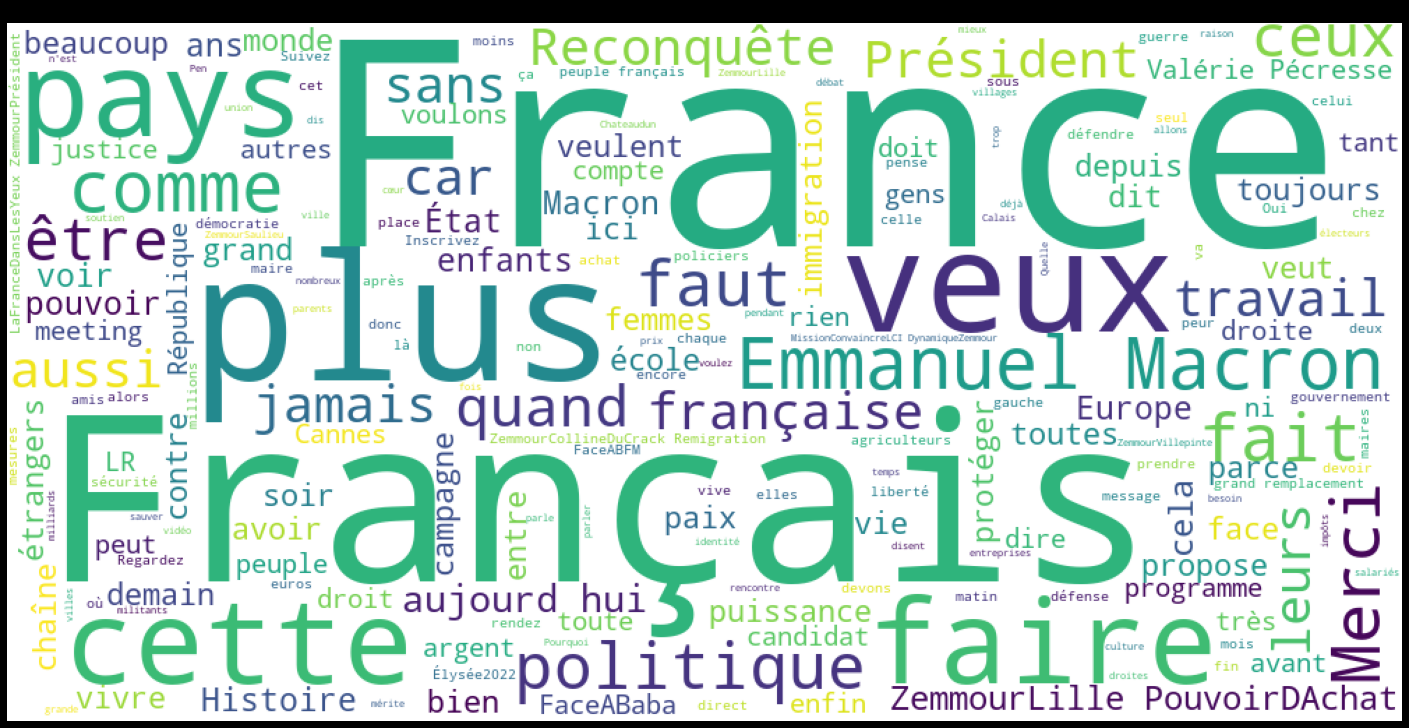

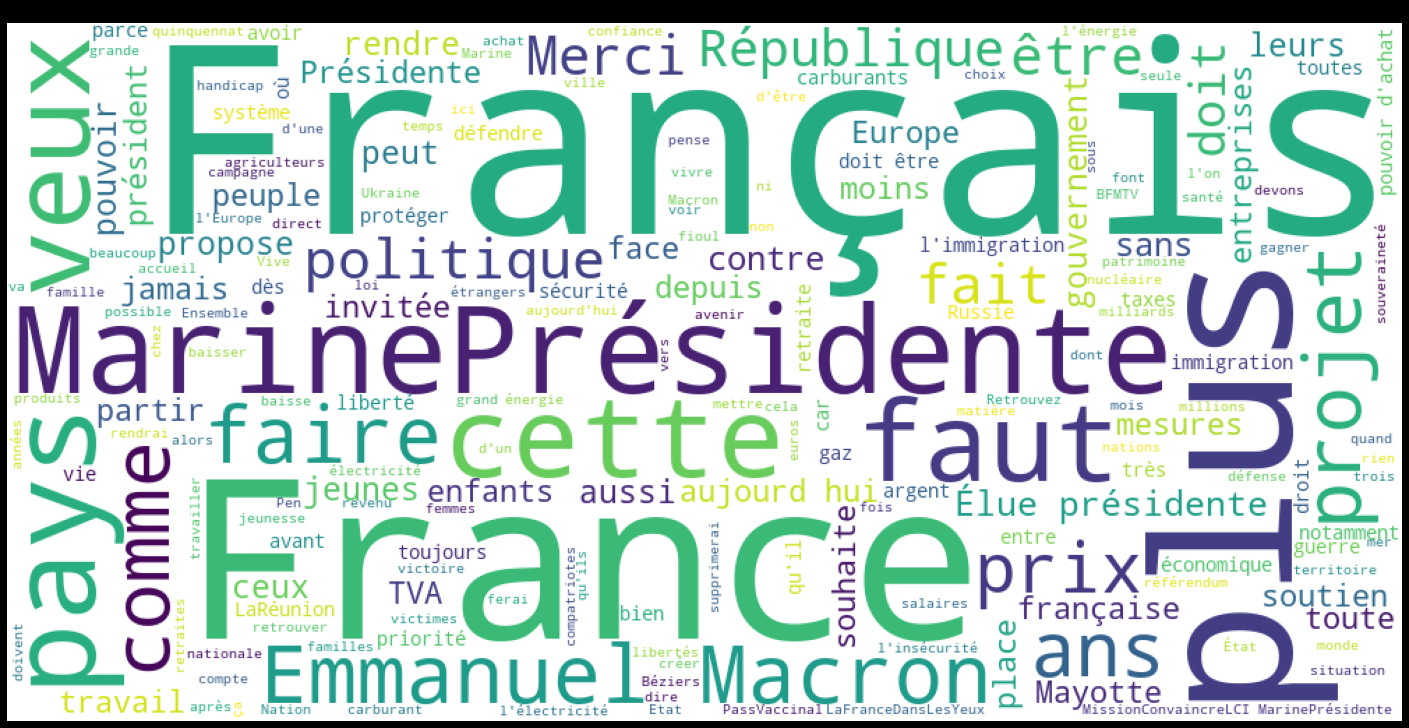

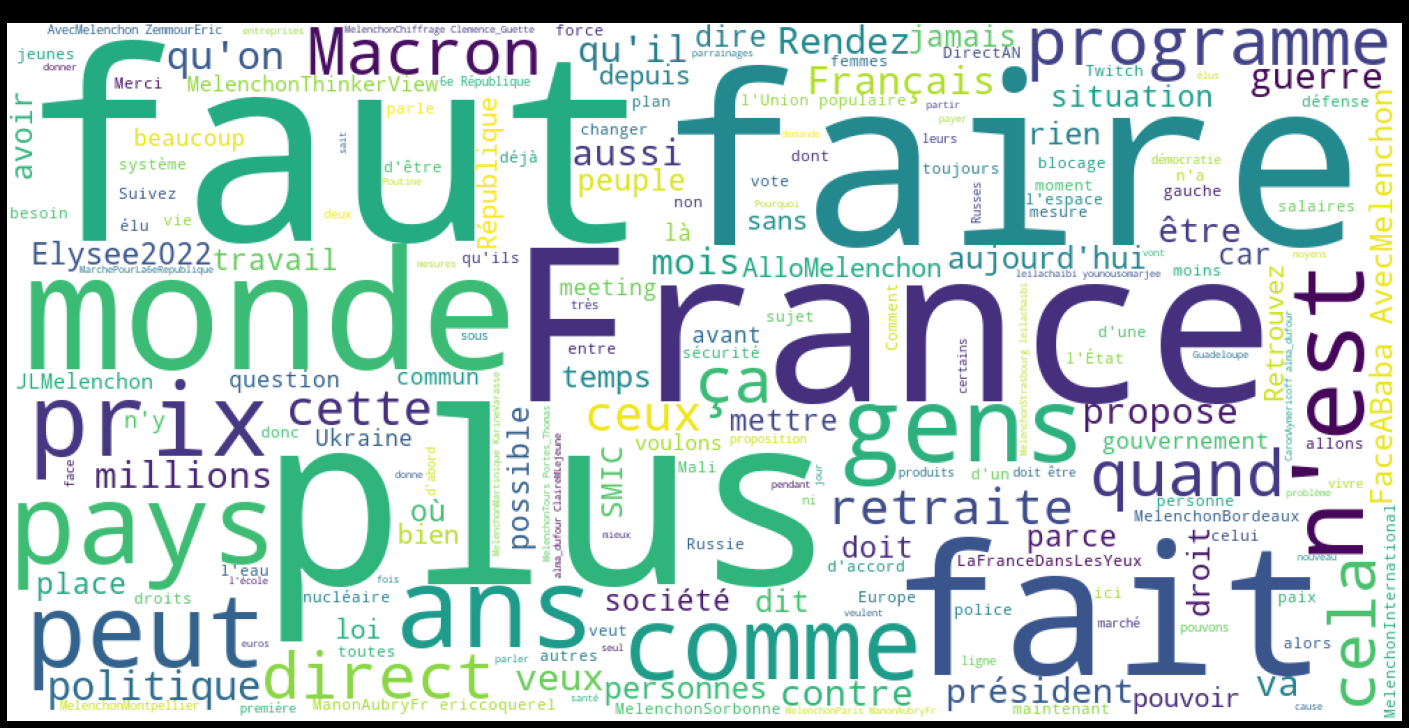

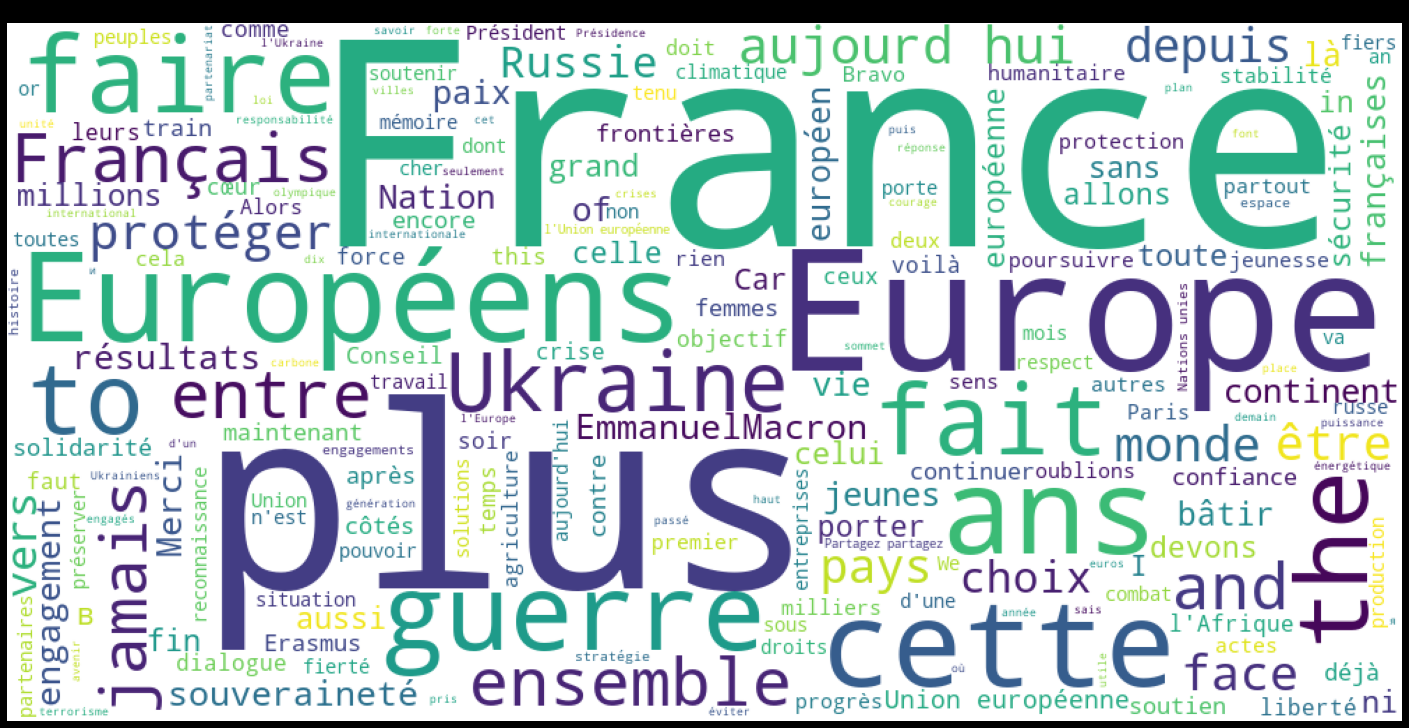

In [88]:
#Plotting the wordclouds for the raw datasets
for df in df_list_text:
    wordcloud(df)

In [90]:
df_list_filter_text=[]
for df in df_list_filtered:
    df_free = df['text'].apply(url_free_text)
    df_list_filter_text.append(df_free)


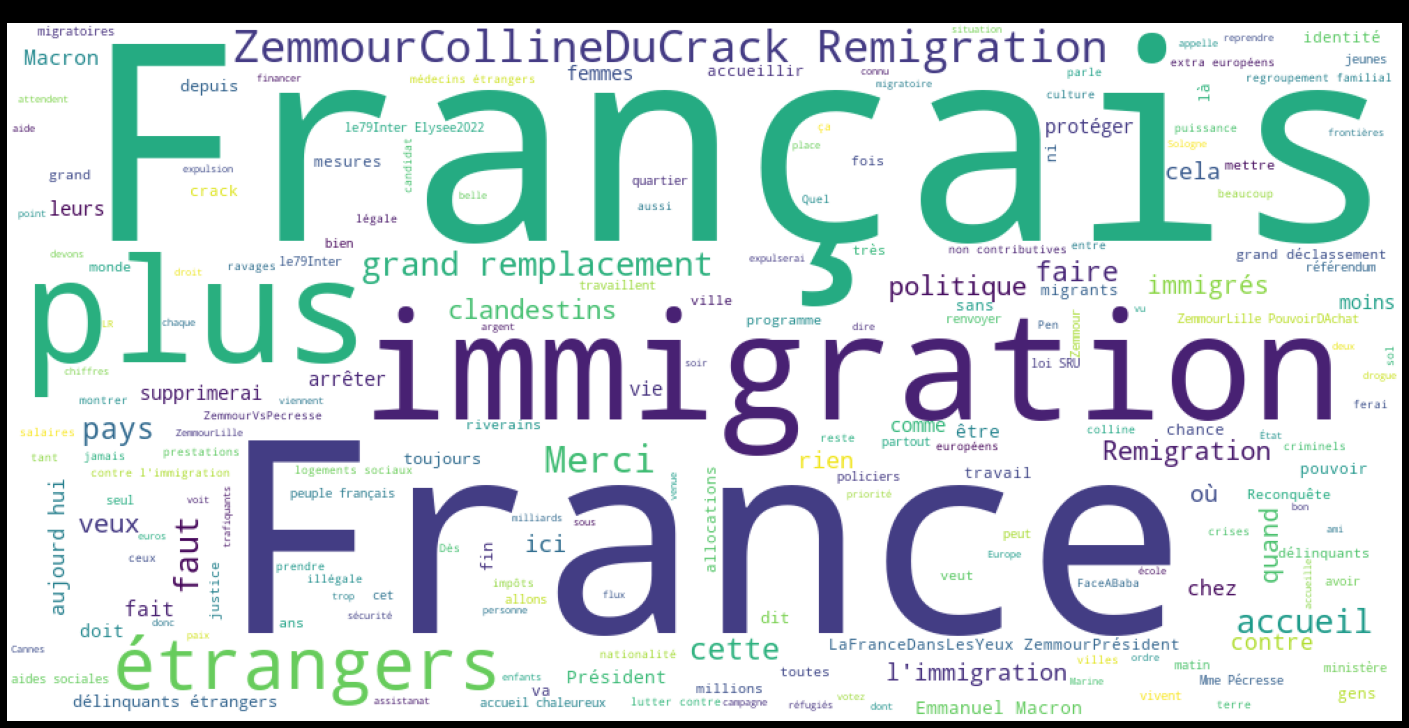

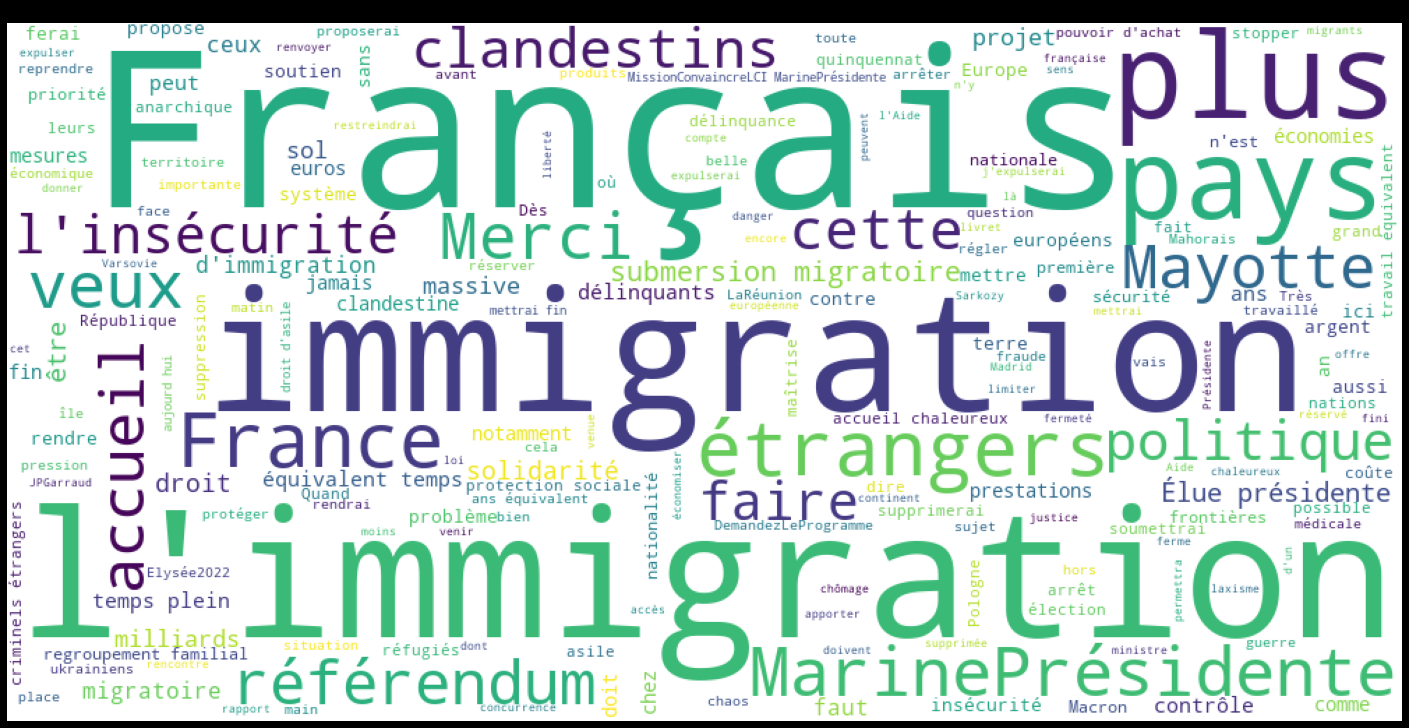

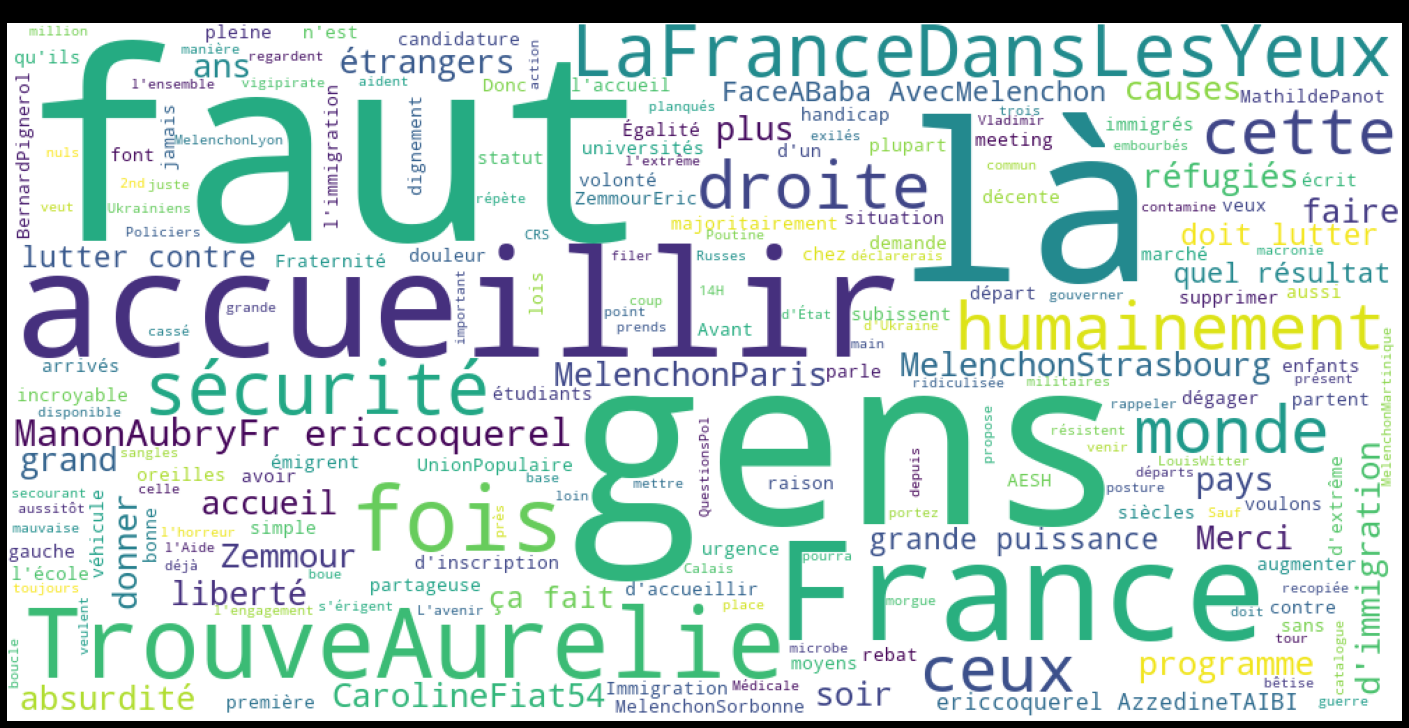

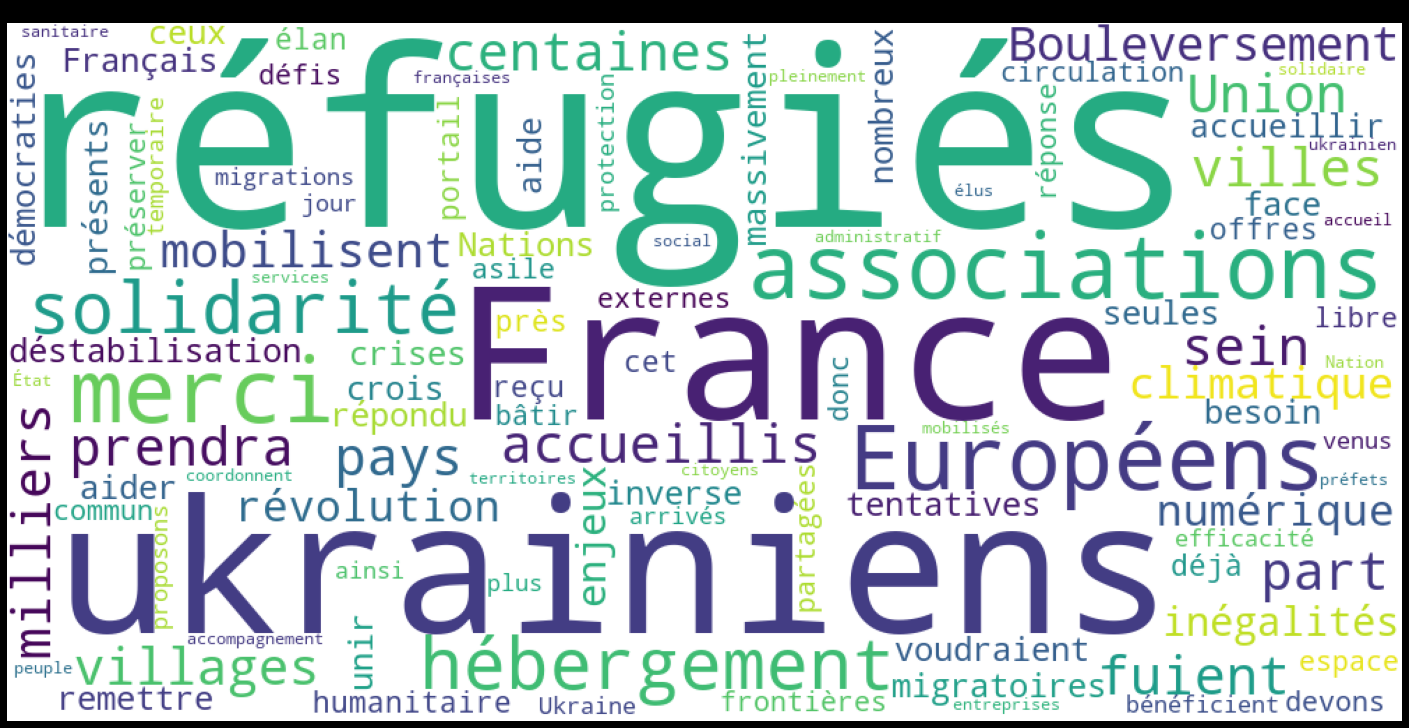

In [91]:
#Plotting the wordclouds for the filtered datasets
for df in df_list_filter_text:
    wordcloud(df)